In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df = pd.read_csv("epldata_final.csv")
df.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


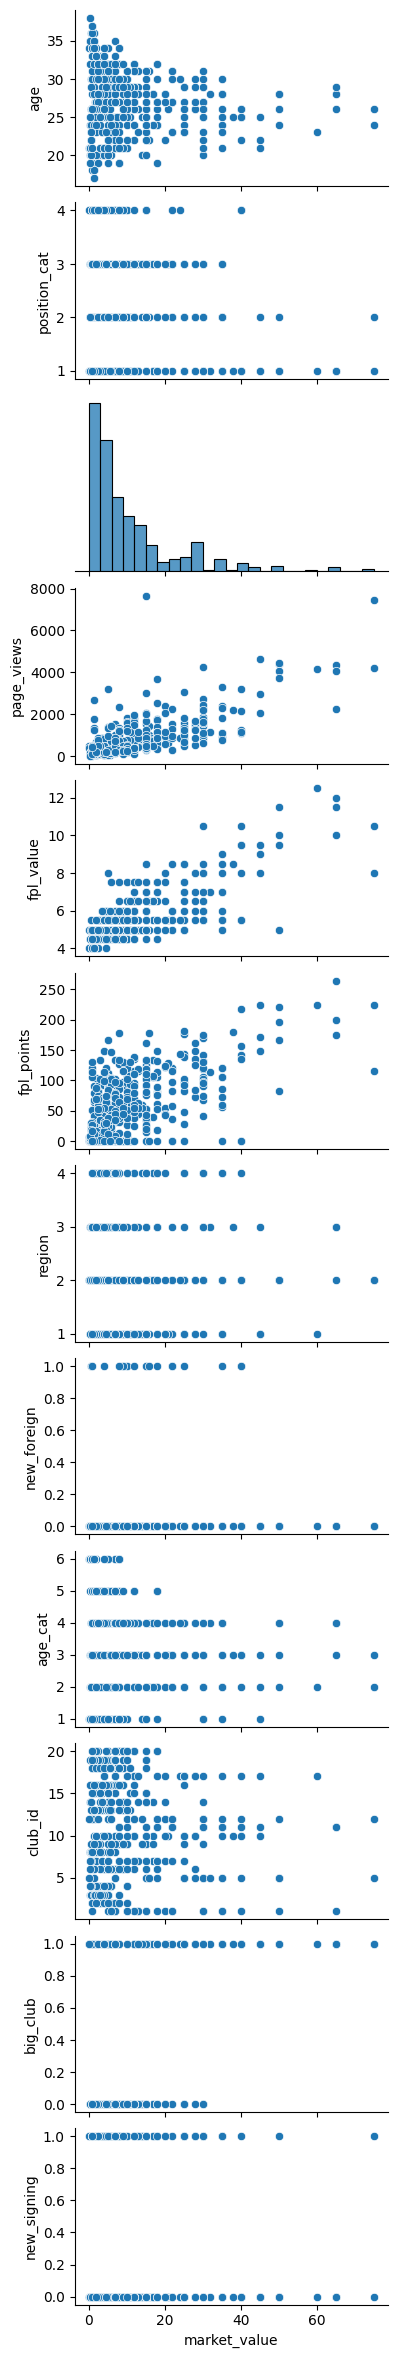

In [62]:
sns.pairplot(df,x_vars=["market_value"],corner=True,height=2,aspect=2)


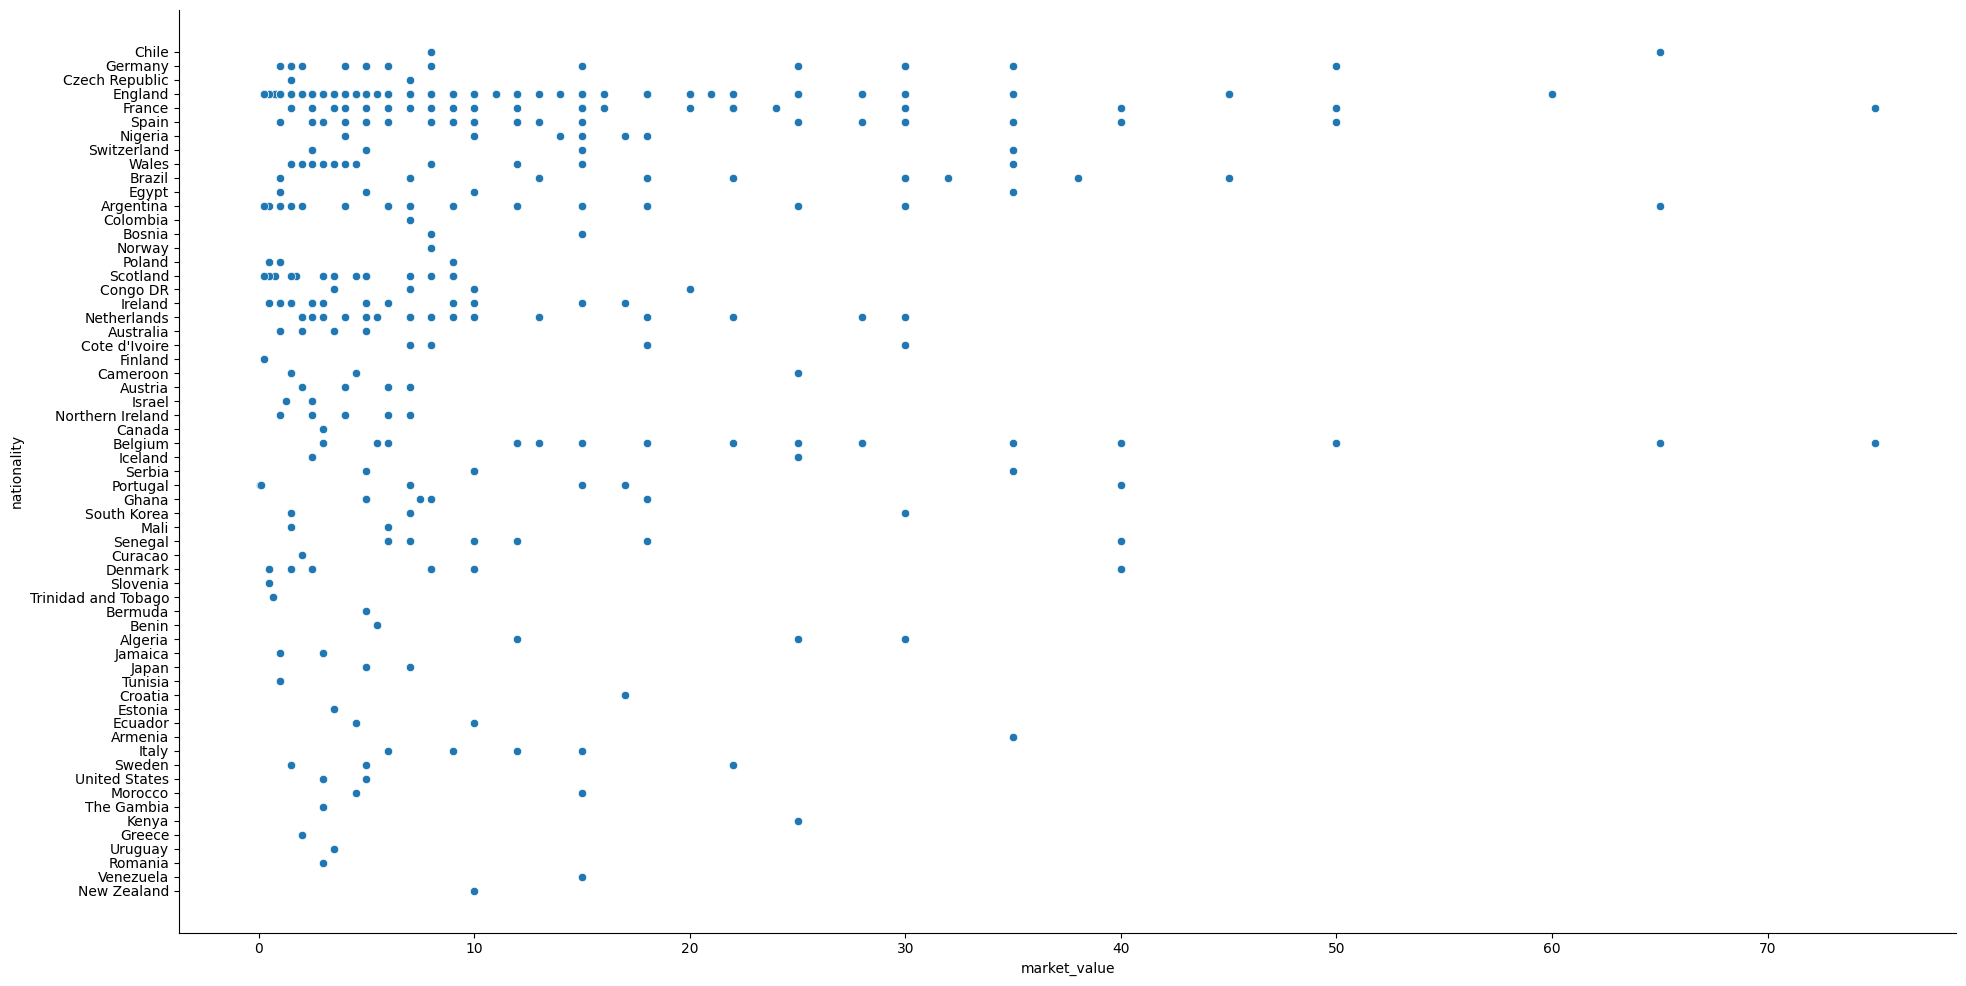

In [63]:
sns.pairplot(df,x_vars=["market_value"],y_vars=["nationality"],corner=False,height=10,aspect=2)


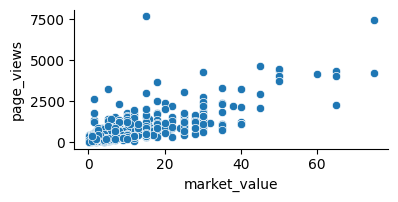

In [64]:
sns.pairplot(df,x_vars=["market_value"],y_vars=["page_views"],corner=False,height=2,aspect=2)


In [65]:
df.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


In [66]:
df.drop(columns=["region","new_foreign","new_signing","club","big_club","club_id","position_cat","age_cat"],inplace = True)

In [67]:
df.head()

,name,age,position,market_value,page_views,fpl_value,fpl_sel,fpl_points,nationality
0,Alexis Sanchez,28,LW,65.0,4329,12.0,17.10%,264,Chile
1,Mesut Ozil,28,AM,50.0,4395,9.5,5.60%,167,Germany
2,Petr Cech,35,GK,7.0,1529,5.5,5.90%,134,Czech Republic
3,Theo Walcott,28,RW,20.0,2393,7.5,1.50%,122,England
4,Laurent Koscielny,31,CB,22.0,912,6.0,0.70%,121,France


In [68]:
df.isna().sum()

name            0
age             0
position        0
market_value    0
page_views      0
fpl_value       0
fpl_sel         0
fpl_points      0
nationality     0
dtype: int64

In [69]:
df.dtypes

name             object
age               int64
position         object
market_value    float64
page_views        int64
fpl_value       float64
fpl_sel          object
fpl_points        int64
nationality      object
dtype: object

In [70]:
df["fpl_sel"] = (df["fpl_value"]).astype("float")
df.dtypes

name             object
age               int64
position         object
market_value    float64
page_views        int64
fpl_value       float64
fpl_sel         float64
fpl_points        int64
nationality      object
dtype: object

In [71]:
freq = df['nationality'].value_counts(normalize=True)
df['nationality_encoded'] = df["nationality"].map(freq)

freq = df['name'].value_counts(normalize=True)
df['name_coded'] = df["name"].map(freq)
df.drop(columns=["name","nationality"],inplace=True)

df = pd.get_dummies(df,dtype=float,drop_first=True)

In [72]:
df

,age,market_value,page_views,fpl_value,fpl_sel,fpl_points,nationality_encoded,name_coded,position_CB,position_CF,position_CM,position_DM,position_GK,position_LB,position_LM,position_LW,position_RB,position_RM,position_RW,position_SS
0,28,65.0,4329,12.0,12.0,264,0.004338,0.002169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,28,50.0,4395,9.5,9.5,167,0.034707,0.002169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,35,7.0,1529,5.5,5.5,134,0.004338,0.002169,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28,20.0,2393,7.5,7.5,122,0.338395,0.002169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,31,22.0,912,6.0,6.0,121,0.054230,0.002169,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,21,5.0,288,4.5,4.5,38,0.008677,0.002169,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
457,23,7.0,199,4.5,4.5,34,0.008677,0.002169,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
458,23,4.5,198,4.5,4.5,29,0.338395,0.002169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
459,21,1.0,412,4.5,4.5,16,0.338395,0.002169,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
class batch_gd:
    def __init__(self,lr = 0.01,epochs=100):
        self.inter = None
        self.coef = None
        self.lr = lr
        self.epochs = epochs

    def train(self,X_train,y_train):
        X_train = np.array(X_train,dtype=np.float64)
        y_train = np.array(y_train,dtype=np.float64)
        self.inter = 0.0
        self.coef = np.zeros(X_train.shape[1])
        

        for i in range(self.epochs):
            y_pred = np.dot(X_train,self.coef)+self.inter
            der_inter = -2*np.mean(y_train-y_pred)
            self.inter = self.inter - self.lr*(der_inter)
            der_coef = (-2*np.dot((y_train - y_pred),X_train))/X_train.shape[0] 
            self.coef = self.coef - self.lr*(der_coef)

        return self.coef,self.inter
    
    def test(self,X_test):
        y_pred = X_test@self.coef + self.inter






In [74]:
X = df.drop("market_value",axis=1)
y = df["market_value"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.25,random_state=42)




In [75]:
x_train.shape,x_test.shape,y_train.shape

((115, 19), (346, 19), (115,))